In [18]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import scipy.stats as stats
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
sns.set(color_codes=True)
import copy



In [10]:
df = pd.read_csv('Wholesale_Customer.csv')
df['Sum'] = df.sum(axis=1)
df.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Sum
0,1,Retail,Other,12669,9656,7561,214,2674,1338,34113
1,2,Retail,Other,7057,9810,9568,1762,3293,1776,33268
2,3,Retail,Other,6353,8808,7684,2405,3516,7844,36613
3,4,Hotel,Other,13265,1196,4221,6404,507,1788,27385
4,5,Retail,Other,22615,5410,7198,3915,1777,5185,46105


In [11]:
df.describe()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Sum
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,220.500000,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455,33446.636364
std,127.161315,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937,26337.432756
min,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000,1059.000000
25%,110.750000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000,17659.750000
50%,220.500000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000,27723.000000
75%,330.250000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000,41431.750000
max,440.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000,199977.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Buyer/Spender     440 non-null    int64 
 1   Channel           440 non-null    object
 2   Region            440 non-null    object
 3   Fresh             440 non-null    int64 
 4   Milk              440 non-null    int64 
 5   Grocery           440 non-null    int64 
 6   Frozen            440 non-null    int64 
 7   Detergents_Paper  440 non-null    int64 
 8   Delicatessen      440 non-null    int64 
 9   Sum               440 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 34.5+ KB


        Buyer/Spender         Fresh         Milk      Grocery       Frozen  \
Region                                                                       
Lisbon     235.000000  11101.727273  5486.415584  7403.077922  3000.337662   
Oporto     317.000000   9887.680851  5088.170213  9218.595745  4045.361702   
Other      202.613924  12533.471519  5977.085443  7896.363924  2944.594937   

        Detergents_Paper  Delicatessen           Sum  
Region                                                
Lisbon       2651.116883   1354.896104  31232.571429  
Oporto       3687.468085   1159.702128  33403.978723  
Other        2817.753165   1620.601266  33992.484177  


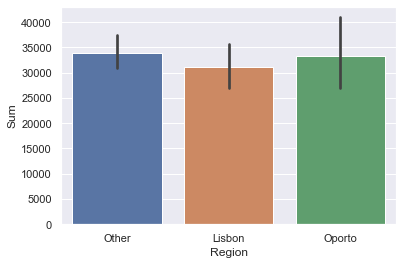

In [15]:
print(df.groupby('Region').mean())
sns.barplot(x='Region', y='Sum', data=df );

         Buyer/Spender         Fresh          Milk       Grocery       Frozen  \
Channel                                                                         
Hotel       238.369128  13475.560403   3451.724832   3962.137584  3748.251678   
Retail      183.000000   8904.323944  10716.500000  16322.852113  1652.612676   

         Detergents_Paper  Delicatessen           Sum  
Channel                                                
Hotel          790.560403   1415.956376  27082.560403  
Retail        7269.507042   1753.436620  46802.232394  


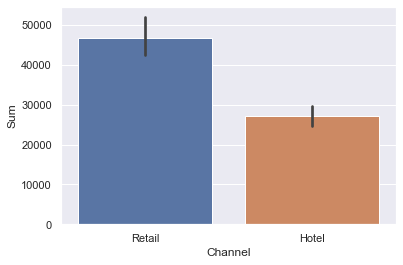

In [16]:
print(df.groupby('Channel').mean())
sns.barplot(x='Channel', y='Sum', data=df );

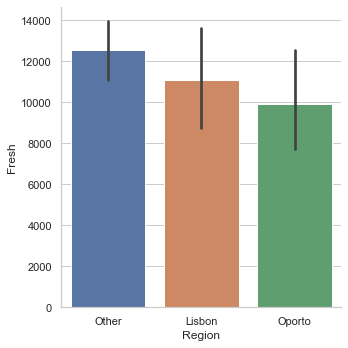

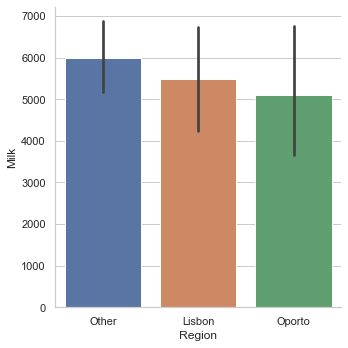

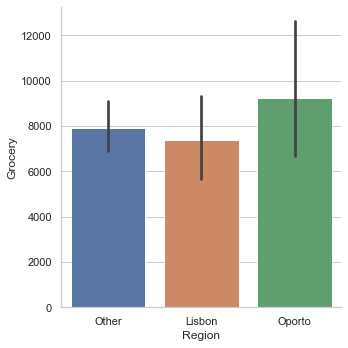

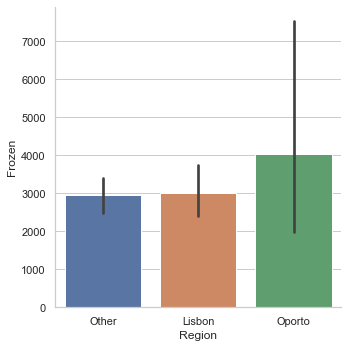

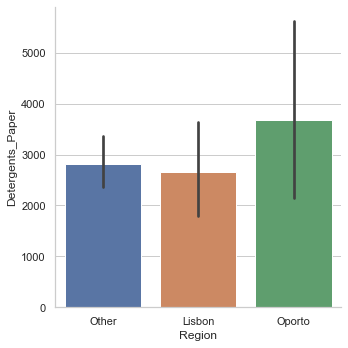

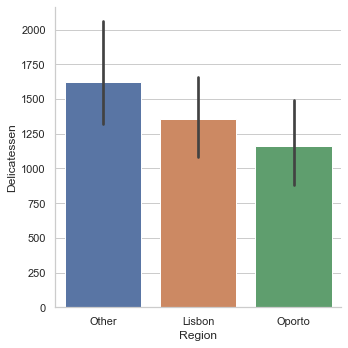

In [30]:
sns.set(style="whitegrid")
sns.catplot(x='Region', y='Fresh', kind='bar',data=df);
sns.catplot(x='Region', y='Milk', kind='bar', data=df);
sns.catplot(x='Region', y='Grocery', kind='bar', data=df);
sns.catplot(x='Region', y='Frozen', kind='bar', data=df);
sns.catplot(x='Region', y='Detergents_Paper', kind='bar', data=df);
sns.catplot(x='Region', y='Delicatessen', kind='bar', data=df);

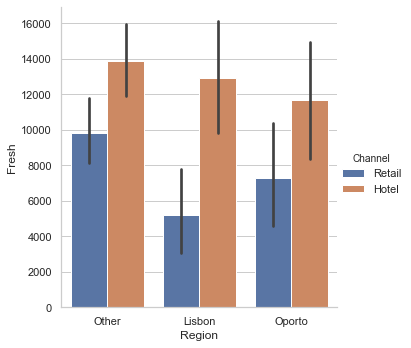

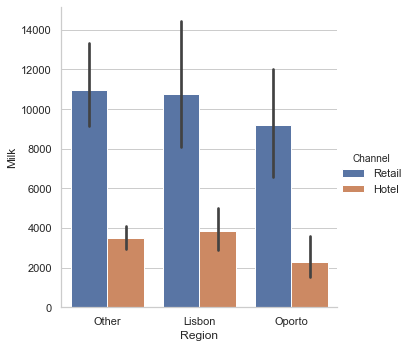

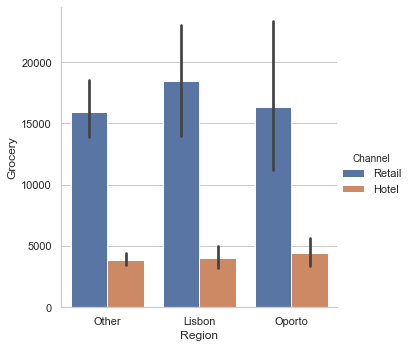

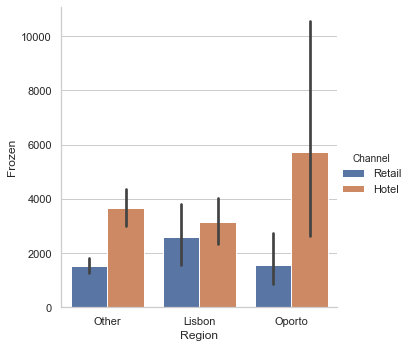

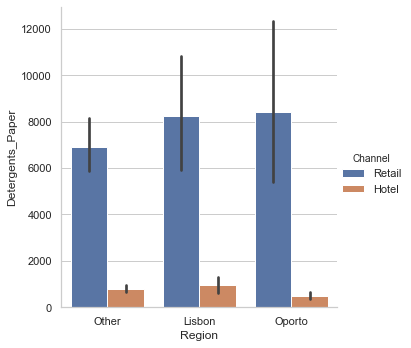

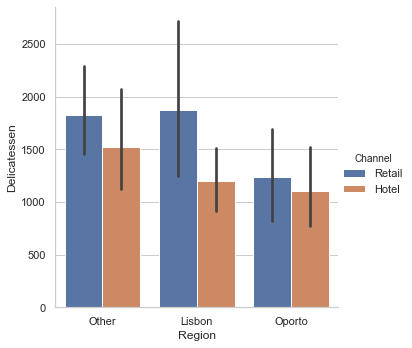

In [32]:

sns.set(style="whitegrid")
sns.catplot(x='Region', y='Fresh',hue='Channel', kind='bar',data=df);
sns.catplot(x='Region', y='Milk',hue='Channel', kind='bar', data=df);
sns.catplot(x='Region', y='Grocery',hue='Channel', kind='bar', data=df);
sns.catplot(x='Region', y='Frozen', hue='Channel',kind='bar', data=df);
sns.catplot(x='Region', y='Detergents_Paper',hue='Channel', kind='bar', data=df);
sns.catplot(x='Region', y='Delicatessen',hue='Channel', kind='bar', data=df);


In [50]:
products= df.iloc[:, 2:9]

#Mean of all products
products_mean=categories.mean()
products_mean

Fresh               12000.297727
Milk                 5796.265909
Grocery              7951.277273
Frozen               3071.931818
Detergents_Paper     2881.493182
Delicatessen         1524.870455
dtype: float64

In [47]:
variance=np.var(products)
variance

Fresh               1.595914e+08
Milk                5.434617e+07
Grocery             9.010485e+07
Frozen              2.351429e+07
Detergents_Paper    2.268077e+07
Delicatessen        7.934923e+06
dtype: float64

In [51]:
#Standard deviation of all products
products_std=products.std()
products_std

Fresh               12647.328865
Milk                 7380.377175
Grocery              9503.162829
Frozen               4854.673333
Detergents_Paper     4767.854448
Delicatessen         2820.105937
dtype: float64

In [52]:

#Coefficient of variation
Coeff_var = products_std/products_mean
Coeff_var

Fresh               1.053918
Milk                1.273299
Grocery             1.195174
Frozen              1.580332
Detergents_Paper    1.654647
Delicatessen        1.849407
dtype: float64

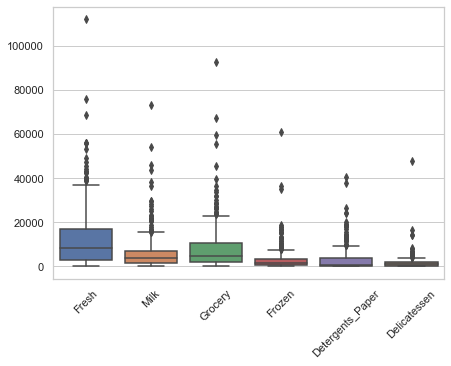

In [60]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5));
sns.boxplot(data=products, orient='v');
plt.xticks(rotation=45);

In [61]:

df_1 = pd.read_csv('Survey-1.csv')
df_1

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,58,Female,21,Senior,International Business,No,2.4,Part-Time,40.0,1,3,1000,Laptop,10
58,59,Female,20,Junior,CIS,No,2.9,Part-Time,40.0,2,4,350,Laptop,250
59,60,Female,20,Sophomore,CIS,No,2.5,Part-Time,55.0,1,4,500,Laptop,500
60,61,Female,23,Senior,Accounting,Yes,3.5,Part-Time,30.0,2,3,490,Laptop,50


In [63]:

table1 = pd.crosstab(df_1['Gender'],df_1['Major'],margins = True,margins_name='Total') 
table1

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,Total
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
Total,7,4,11,6,10,7,14,3,62


In [64]:
table2 = pd.crosstab(df_1['Gender'],df_1['Grad Intention'],margins = True,margins_name='Total') 
table2

Grad Intention,No,Undecided,Yes,Total
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
Total,12,22,28,62


In [65]:
table3 = pd.crosstab(df_1['Gender'],df_1['Employment'],margins = True,margins_name='Total') 
table3

Employment,Full-Time,Part-Time,Unemployed,Total
Gender,,,,
Female,3,24,6,33
Male,7,19,3,29
Total,10,43,9,62


In [66]:
table4 = pd.crosstab(df_1['Gender'],df_1['Computer'],margins = True,margins_name='Total') 
table4

Computer,Desktop,Laptop,Tablet,Total
Gender,,,,
Female,2,29,2,33
Male,3,26,0,29
Total,5,55,2,62


In [67]:
df_1['Gender'].value_counts()

Female    33
Male      29
Name: Gender, dtype: int64

In [71]:
#2.2.1
df_1['Gender'].value_counts()
probability_male=(33/62)
print(probability_male)
probability_fmale=1 - probability_male
print(probability_fmale)

0.532258064516129
0.467741935483871


In [85]:
#Conditional Probability of Male
print("Conditional probabilities of males in each major \n")
print('Accounting=',4/29)
print('CIS =',1/29)
print('Economics Finance =', 4/29)
print('International_Business =', 2/29)
print('Managements =',6/29)
print('Other =', 4/29)
print('Retailing Marketing=', 5/29)
print('Undecided =', 3/29)

#Conditional Probability of Female
print("Conditional probabilities of Females in each major \n")
print('Accounting=', 3/33)
print('CIS=', 3/33)
print('Economics Finance=', 7/33)
print('International Business=', 4/33)
print('Managements =', 4/33)
print('Other =', 3/33)
print('Retailing Marketing=', 9/33)
print('Undecided_1 =', 0)




Conditional probabilities of males in each major 

Accounting= 0.13793103448275862
CIS = 0.034482758620689655
Economics Finance = 0.13793103448275862
International_Business = 0.06896551724137931
Managements = 0.20689655172413793
Other = 0.13793103448275862
Retailing Marketing= 0.1724137931034483
Undecided = 0.10344827586206896
Conditional probabilities of Females in each major 

Accounting= 0.09090909090909091
CIS= 0.09090909090909091
Economics Finance= 0.21212121212121213
International Business= 0.12121212121212122
Managements = 0.12121212121212122
Other = 0.09090909090909091
Retailing Marketing= 0.2727272727272727
Undecided_1 = 0


In [88]:
Grad_male = 17/29
Grad_Female =11/33
print(Grad_male ,Grad_Female )

0.5862068965517241 0.3333333333333333


In [92]:
print("Employment status of Men \n")
print("Full Time",7/29)
print("Part Time",19/29)
print("Unemployed",3/29)
print("\n")
print("Employment status of Women \n")
print("Full Time",3/33)
print("Part Time",24/33)
print("Unemployed",6/33)


Employment status of Men 

Full Time 0.2413793103448276
Part Time 0.6551724137931034
Unemployed 0.10344827586206896


Employment status of Women 

Full Time 0.09090909090909091
Part Time 0.7272727272727273
Unemployed 0.18181818181818182


In [94]:
print("Laptop Preference for male students", 26/29)
print("Laptop Preference for Female students", 29/33)


Laptop Preference for male students 0.896551724137931
Laptop Preference for Female students 0.8787878787878788


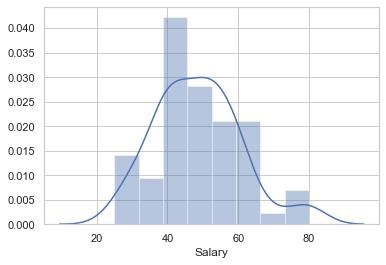

In [101]:
graph1= sns.distplot(df_1['Salary']);


In [105]:

print("Mean",df_1['Salary'].mean())
print("Median",df_1['Salary'].median())
print("Mode", df_1['Salary'].mode())

Mean 48.54838709677419
Median 50.0
Mode 0    40.0
dtype: float64


In [97]:
from scipy.stats import shapiro
stat, p = shapiro(df_1['Salary'])
p

0.028000956401228905

In [107]:

alpha = 0.05
if p > alpha:
    print('Normal Distribution ')
else:
    print('It is not Normal Distribution')

It is not Normal Distribution


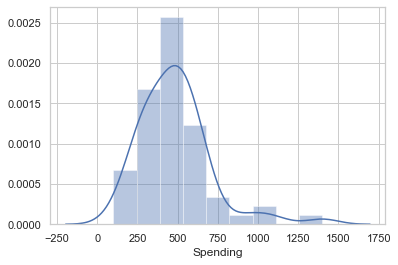

In [109]:
sns.distplot(df_1['Spending']);

In [108]:
print("Mean",df_1['Spending'].mean())
print("Median",df_1['Spending'].median())
print("Mode", df_1['Spending'].mode())

Mean 482.01612903225805
Median 500.0
Mode 0    500
dtype: int64


In [110]:
stat, p1 = shapiro(df_1['Spending'])
p1

1.6854661225806922e-05

In [111]:

alpha = 0.05
if p1 > alpha:
    print('Normal Distribution ')
else:
    print('It is not Normal Distribution')

It is not Normal Distribution


In [112]:
stat, p2 = shapiro(df_1['Text Messages'])
p2

alpha = 0.05
if p2 > alpha:
    print('Normal Distribution ')
else:
    print('It is not Normal Distribution')

It is not Normal Distribution


In [113]:
print("Mean",df_1['Text Messages'].mean())
print("Median",df_1['Text Messages'].median())
print("Mode", df_1['Text Messages'].mode())

Mean 246.20967741935485
Median 200.0
Mode 0    300
dtype: int64


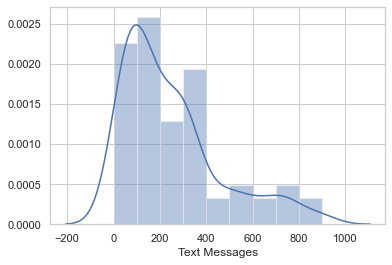

In [114]:
sns.distplot(df_1['Text Messages']);

In [115]:
from scipy.stats import ttest_1samp, ttest_ind, mannwhitneyu, levene, shapiro
from statsmodels.stats.power import ttest_power

In [116]:
df_2 = pd.read_csv('A & B shingles-1.csv')
df_2.head()

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37


In [118]:
df_2.isnull().sum().sum()

5

In [120]:

data = df_2.fillna(0)
data

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37
5,0.24,0.18
6,0.16,0.42
7,0.20,0.58
8,0.20,0.25
9,0.20,0.41


In [143]:
data_A = df_2['A']
data_A = np.array(data_A)
t_statistic, p_value = ttest_1samp(data_A, 0.35,nan_policy='omit')

print (" p-value", p_value)
print (" T-Statistic", t_statistic)
if ( t_statistic > 0) & (p_value/2 < alpha):
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")


 p-value 0.14955266289815025
 T-Statistic -1.4735046253382782
we accept null hypothesis


In [141]:
data_B = df_2['B']
data_B = np.array(data_B)

t_statistic1, p_value1 = ttest_1samp(data_B, 0.35, nan_policy='omit')
print (" p-value", p_value1)
print (" T-Statistic", t_statistic1)
if ( t_statistic1 > 0) & (p_value1/2 < alpha):
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")


 p-value 0.004180954800638365
 T-Statistic -3.1003313069986995
we accept null hypothesis


In [142]:

t_statistic2, p_value2 = ttest_ind(df_2['A'], df_2['B'], nan_policy='omit')
print(t_statistic2, p_value2)
if p_value2 < alpha:
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

1.2896282719661123 0.2017496571835306
we accept null hypothesis
